# Example 08: Temperature scaling two ways

Finding the free energy as a function of the temperature can be calculated using reversible scaling methodology (mode `ts`) as discussed in previous examples. 

However, calphy provides another mode `tscale` that can be used for the same purpose. In this example, `ts` and `tscale` modes are compared. Before that:

- *What is the difference between `ts` and `tscale`?*  
  `ts` performs reversible scaling method. Here, the simulation is performed at a constant temperature; but the potential energy is scaled. In `tscale`, the temperature is directly scaled.
  
- *Why do we need `tscale`?*  
  If `ts` mode works for the given potential, it should be used. `ts`, however, needs the [`pair hybrid/scaled`](https://docs.lammps.org/pair_hybrid.html). If this is not possible due to some restriction of the potential, `tscale` can be used.

For this example, we will use the following EAM potential: [Mishin, Y., M. J. Mehl, D. A. Papaconstantopoulos, A. F. Voter, and J. D. Kress. “Structural Stability and Lattice Defects in Copper: Ab Initio , Tight-Binding, and Embedded-Atom Calculations.” Physical Review B 63, no. 22 (May 21, 2001): 224106.](https://doi.org/10.1103/PhysRevB.63.224106)

The input file is given in `input.yaml`. There are two sets of calculations, one with mode `tscale`, and another one with mode `ts` that can be used for comparison. 

The calculation can be run by,
```
calphy -i input.yaml
```

After the caculation is over, we can plot the free energy as a function of temperature.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
t1, fe1, ferr1 = np.loadtxt("ts-FCC-1200-0/temperature_sweep.dat", unpack=True)
t2, fe2, ferr2 = np.loadtxt("tscale-FCC-1200-0/temperature_sweep.dat", unpack=True)

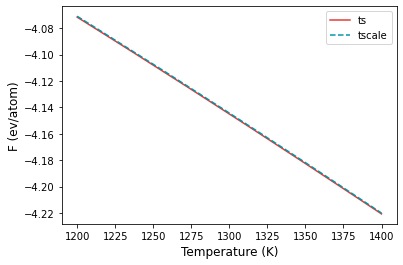

In [4]:
plt.plot(t1, fe1, color="#E53935", label="ts")
plt.plot(t2, fe2, color="#0097A7", ls="dashed", label="tscale")
plt.xlabel("Temperature (K)", fontsize=12)
plt.ylabel("F (ev/atom)", fontsize=12)
plt.legend()

As seen from the plot above, both modes agree very well with each other. Now we can compare the error in both methods.